In [616]:
import pandas as pd
import numpy as np

In [652]:
df = pd.read_csv("/content/customer_dataset.csv")

<ipython-input-652-e777aef13dda>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/customer_dataset.csv")


In [618]:
df.describe()

,customer_id,average_monthly_basket_size
count,570000.000000,560714.000000
mean,279994.112840,13.295679
std,161638.615282,12.039603
min,1.000000,-19.000000
25%,140029.750000,3.800000
50%,279997.500000,9.790000
75%,419950.250000,17.490000
max,560000.000000,385.040000


In [619]:
df.head()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [620]:
df.shape

(570000, 4)

In [635]:
def check_type(value):
  try:
    float(value)
  except ValueError:
    print(value)

df['average_monthly_spend'].apply(check_type)
# df['average_monthly_spend'] = df['average_monthly_spend'].apply(check_type)

0         None
1         None
2         None
3         None
4         None
          ... 
559998    None
559999    None
568257    None
568681    None
569999    None
Name: average_monthly_spend, Length: 560000, dtype: object

In [653]:
# Mapping dictionary for number words to digits
number_map = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13, "fourteen": 14,
    "fifteen": 15, "sixteen": 16, "seventeen": 17, "eighteen": 18, "nineteen": 19,
    "twenty": 20, "twenty-one": 21, "twenty-two": 22, "twenty-three": 23, "twenty-four": 24,
    "twenty-five": 25, "twenty-six": 26, "twenty-seven": 27, "twenty-eight": 28, "twenty-nine": 29,
    "thirty": 30, "hundred" : 100
}

def word_to_float(value):
    # Check if the value is already a float
    try:
        float(value)
        return value
    except ValueError:
        pass

    # If the value is a string, process it
    parts = value.split()
    result = []

    for part in parts:
        if part == "point":
            result.append(".")
        else:
            result.append(str(number_map.get(part, part)))  # Use get to handle unexpected parts gracefully
    print(float("".join(result)))
    return float("".join(result))

df.loc[df['customer_id'] == 27   , 'average_monthly_spend'] = 900
df.loc[df['customer_id'] == 326776    , 'average_monthly_visit_frequency'] = 22


In [654]:
df['average_monthly_visit_frequency'] = df['average_monthly_visit_frequency'].apply(word_to_float).astype(float)
df['average_monthly_spend'] = df['average_monthly_spend'].astype(float)

1.2
9.5
2.0
3.4


In [655]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,570000.000000,5.606140e+05,560672.000000,560714.000000
mean,279994.112840,4.826518e+04,6.878535,13.295679
std,161638.615282,9.000251e+04,5.321111,12.039603
min,1.000000,-1.233400e+04,-20.000000,-19.000000
25%,140029.750000,1.050100e+04,2.390000,3.800000
50%,279997.500000,3.196900e+04,5.600000,9.790000
75%,419950.250000,8.543975e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [583]:
(df["average_monthly_spend"].isnull()).any()
# (df["average_monthly_visit_frequency"].isnull()).any()
# (df["average_monthly_basket_size"].isnull()).any()

True

In [656]:
def plots(input_df):
  # Plot boxplots for the three variables
  plt.figure(figsize=(18, 6))

  # Monthly Spend Boxplot
  plt.subplot(1, 3, 1)
  sns.boxplot(y=input_df['average_monthly_spend'])
  plt.title('Boxplot of Monthly Spend')
  plt.ylabel('Monthly Spend')

  # Monthly Visits Frequency Boxplot
  plt.subplot(1, 3, 2)
  sns.boxplot(y=input_df['average_monthly_visit_frequency'])
  plt.title('Boxplot of Monthly Visits Frequency')
  plt.ylabel('Monthly Visits Frequency')

  # Monthly Basket Size Boxplot
  plt.subplot(1, 3, 3)
  sns.boxplot(y=input_df['average_monthly_basket_size'])
  plt.title('Boxplot of Monthly Basket Size')
  plt.ylabel('Monthly Basket Size')

  plt.tight_layout()
  plt.show()


In [657]:
(df["average_monthly_spend"]<0).any()
# (df["average_monthly_visit_frequency"]<0).any()
# (df["average_monthly_basket_size"]<0).any()

True

In [658]:
df["customer_id"].value_counts()

customer_id
320364    2
220914    2
512972    2
294139    2
63823     2
         ..
188309    1
188308    1
188307    1
188306    1
560000    1
Name: count, Length: 560000, dtype: int64

In [659]:
duplicate_ids = df[df.duplicated('customer_id')]['customer_id'].unique()
print(len(duplicate_ids))

10000


In [660]:
df_duplicate = df[df.duplicated('customer_id')]
df_duplicate


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
560000,152049,43098.0,5.45,9.57
560001,451910,94620.0,10.51,39.92
560002,182173,14341.0,1.50,1.24
560003,111786,99126.0,19.35,18.80
560004,466347,36932.0,5.90,10.65
...,...,...,...,...
569995,341740,27428.0,4.91,9.42
569996,215276,141241.0,15.47,31.13
569997,11515,9183.0,2.09,4.61
569998,205260,35541.0,4.22,9.65


In [662]:
# prompt: need to do this for all duplicate_ids using df_duplicate

for i in duplicate_ids:
  df_dup_rows = df[df["customer_id"] == i].index
  row_1 = df.iloc[df_dup_rows[0]]
  row_2 = df.iloc[df_dup_rows[1]]
  if(row_1.equals(row_2)):
    pass
  else:
    print(df_dup_rows[0])
    print(row_1, row_2)


322879
customer_id                        322880.00
average_monthly_spend              -12334.00
average_monthly_visit_frequency         2.97
average_monthly_basket_size             4.80
Name: 322879, dtype: float64 customer_id                        322880.00
average_monthly_spend               14232.00
average_monthly_visit_frequency         2.97
average_monthly_basket_size             4.80
Name: 568257, dtype: float64
514835
customer_id                        514836.0
average_monthly_spend               11460.0
average_monthly_visit_frequency        -1.0
average_monthly_basket_size             3.1
Name: 514835, dtype: float64 customer_id                        514836.00
average_monthly_spend               11460.00
average_monthly_visit_frequency         1.97
average_monthly_basket_size             3.10
Name: 568681, dtype: float64
244800
customer_id                        244801.00
average_monthly_spend                4225.00
average_monthly_visit_frequency         2.94
average_mont

In [663]:
# prompt: 322879, 514835, 244800 drop these rows
df.drop([322879, 514835, 244800], axis=0, inplace=True)

In [664]:
df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,NaN
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
...,...,...,...,...
569995,341740,27428.0,4.91,9.42
569996,215276,141241.0,15.47,31.13
569997,11515,9183.0,2.09,4.61
569998,205260,35541.0,4.22,9.65


In [668]:
df_duplicate = df[df.duplicated('customer_id')]
df.drop_duplicates(inplace=True)

In [669]:
df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,NaN
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
...,...,...,...,...
559998,559999,3876.0,1.14,2.84
559999,560000,1556.0,2.32,3.48
568257,322880,14232.0,2.97,4.80
568681,514836,11460.0,1.97,3.10


In [670]:
df.describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,560000.000000,5.506140e+05,550672.000000,550714.000000
mean,280000.500000,4.826648e+04,6.878373,13.294153
std,161658.219711,9.058991e+04,5.321820,12.039581
min,1.000000,-1.000000e+00,-20.000000,-19.000000
25%,140000.750000,1.050000e+04,2.390000,3.800000
50%,280000.500000,3.197000e+04,5.600000,9.790000
75%,420000.250000,8.544300e+04,9.850000,17.490000
max,560000.000000,4.833000e+07,432.740000,385.040000


In [671]:
df_minus = df.loc[(df["average_monthly_visit_frequency"] < 0) | (df["average_monthly_basket_size"] < 0) | (df["average_monthly_spend"] < 0)]
df_minus

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
139,140,86989.0,-3.00,35.50
238,239,48728.0,-20.00,10.52
314,315,1040.0,-1.00,1.69
482,483,99100.0,19.24,-19.00
628,629,43144.0,-1.00,10.61
756,757,24336.0,-10.00,10.10
323073,323074,48516.0,-4.50,10.59
324157,324158,-1.0,2.65,2.79
516161,516162,94869.0,-12.00,17.52
516377,516378,49875.0,-20.00,9.25


In [672]:
df.loc[df["average_monthly_spend"] == 1].describe()

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,15.000000,15.0,15.000000,15.000000
mean,272059.000000,1.0,1.722667,2.512667
std,165323.787789,0.0,0.645340,1.251196
min,2287.000000,1.0,1.000000,1.040000
25%,180533.000000,1.0,1.120000,1.685000
50%,278408.000000,1.0,1.680000,2.000000
75%,366489.000000,1.0,2.285000,3.270000
max,544681.000000,1.0,2.850000,4.980000


In [673]:
df.loc[df["average_monthly_basket_size"] == 19].describe()


,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,84.000000,82.000000,81.000000,84.0
mean,288602.452381,95087.926829,19.172346,19.0
std,174902.740726,8699.078557,0.396400,0.0
min,10884.000000,80436.000000,18.500000,19.0
25%,135833.750000,87539.250000,18.810000,19.0
50%,297948.000000,96724.500000,19.160000,19.0
75%,454937.250000,102354.750000,19.460000,19.0
max,557917.000000,109896.000000,19.940000,19.0


In [674]:
# prompt: make 482 index average_monthly_basket_size into 19
df.loc[482, 'average_monthly_basket_size'] = 19
df.loc[324157, 'average_monthly_spend'] =  1

In [675]:
df_minus = df.loc[(df["average_monthly_visit_frequency"] < 0) | (df["average_monthly_basket_size"] < 0) | (df["average_monthly_spend"] < 0)]
df_minus

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
139,140,86989.0,-3.00,35.50
238,239,48728.0,-20.00,10.52
314,315,1040.0,-1.00,1.69
628,629,43144.0,-1.00,10.61
756,757,24336.0,-10.00,10.10
323073,323074,48516.0,-4.50,10.59
516161,516162,94869.0,-12.00,17.52
516377,516378,49875.0,-20.00,9.25
516512,516513,-1.0,7.23,9.45


In [676]:
# prompt: drop all other minus rows from df
df = df.drop(df_minus.index)
df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.84
1,2,176875.0,15.74,33.83
2,3,6812.0,2.11,NaN
3,4,38542.0,7.82,10.73
4,5,48712.0,7.51,10.04
...,...,...,...,...
559998,559999,3876.0,1.14,2.84
559999,560000,1556.0,2.32,3.48
568257,322880,14232.0,2.97,4.80
568681,514836,11460.0,1.97,3.10


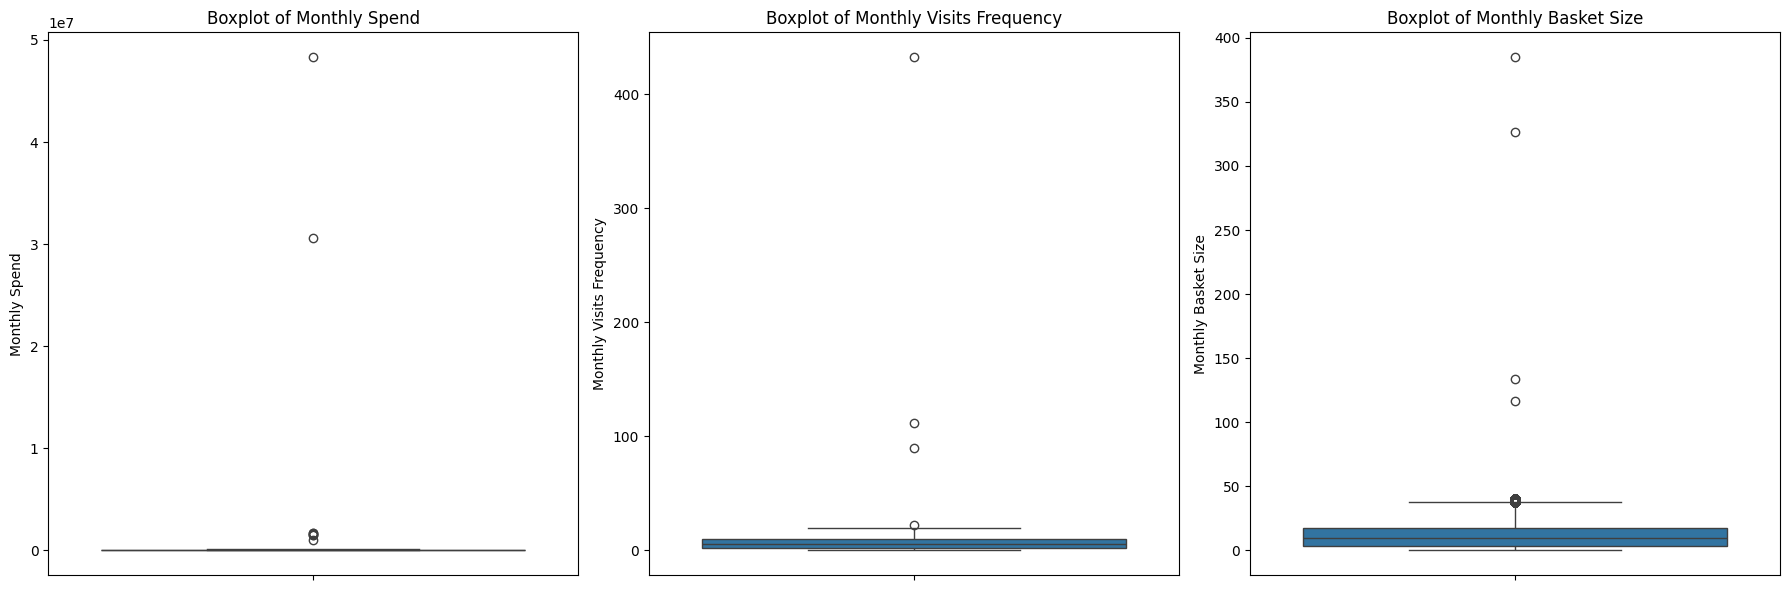

In [677]:
plots(df)

In [678]:
# prompt: reset index to customer_id
df = df.set_index('customer_id')

In [679]:
df.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
count,5.506050e+05,550663.000000,550705.000000
mean,4.826655e+04,6.878603,13.294230
std,9.059057e+04,5.321448,12.039549
min,0.000000e+00,0.000000,0.000000
25%,1.050000e+04,2.390000,3.800000
50%,3.197000e+04,5.600000,9.790000
75%,8.544300e+04,9.850000,17.490000
max,4.833000e+07,432.740000,385.040000


In [680]:
df["average_monthly_spend"].fillna(value=3.197000e+04, inplace=True)
df["average_monthly_visit_frequency"].fillna(value=5.600000	, inplace=True)
df["average_monthly_basket_size"].fillna(value=9.790000, inplace=True)

In [681]:
df

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
customer_id,,,
1,790.0,1.11,2.84
2,176875.0,15.74,33.83
3,6812.0,2.11,9.79
4,38542.0,7.82,10.73
5,48712.0,7.51,10.04
...,...,...,...
559999,3876.0,1.14,2.84
560000,1556.0,2.32,3.48
322880,14232.0,2.97,4.80


In [709]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        print(column,lower_bound,upper_bound)
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_updated = remove_outliers(df, ["average_monthly_spend", "average_monthly_visit_frequency"])


average_monthly_spend -100479.25 195954.75
average_monthly_visit_frequency -8.575000000000001 20.745


In [710]:
df_updated

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
customer_id,,,
1,790.0,1.11,2.84
2,176875.0,15.74,33.83
3,6812.0,2.11,9.79
4,38542.0,7.82,10.73
5,48712.0,7.51,10.04
...,...,...,...
559999,3876.0,1.14,2.84
560000,1556.0,2.32,3.48
322880,14232.0,2.97,4.80


In [711]:
# Calculate Q1 and Q3
Q1 = df_updated['average_monthly_basket_size'].quantile(0.25)
Q3 = df_updated['average_monthly_basket_size'].quantile(0.75)

# Define lower and upper bounds for Winsorizing
lower_bound = df_updated['average_monthly_basket_size'].quantile(0.05)
upper_bound = df_updated['average_monthly_basket_size'].quantile(0.95)

# Winsorize the data
df_updated.loc[:, 'average_monthly_basket_size'] = df_updated['average_monthly_basket_size'].clip(lower=lower_bound, upper=upper_bound)


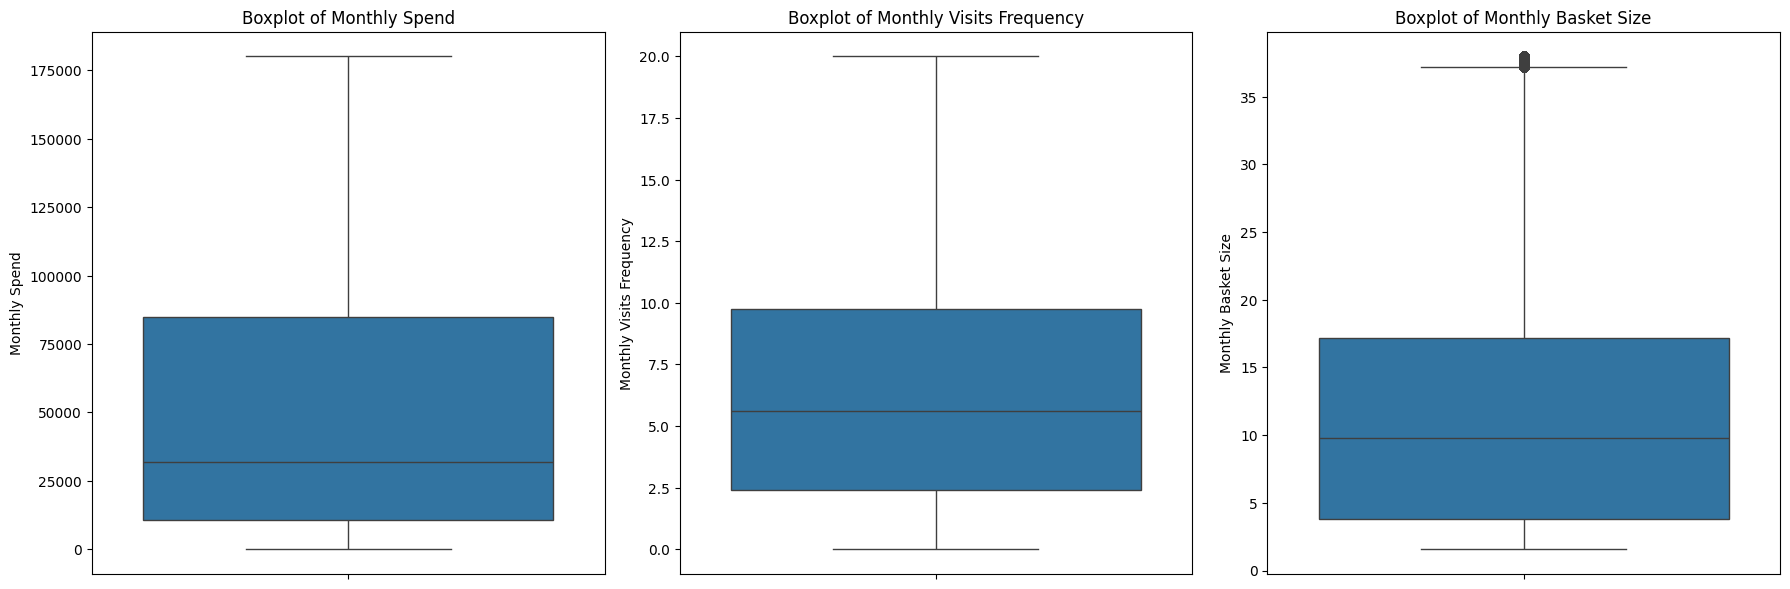

In [706]:
plots(df_updated)

In [712]:
df_updated

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
customer_id,,,
1,790.0,1.11,2.84
2,176875.0,15.74,33.83
3,6812.0,2.11,9.79
4,38542.0,7.82,10.73
5,48712.0,7.51,10.04
...,...,...,...
559999,3876.0,1.14,2.84
560000,1556.0,2.32,3.48
322880,14232.0,2.97,4.80


Clustering Testing


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


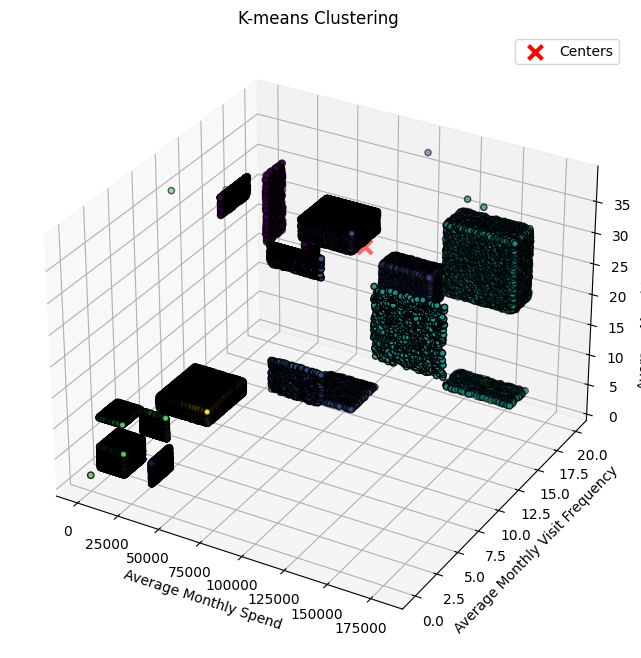

In [713]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Select relevant columns
selected_columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']
data = df_updated[selected_columns]

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 4: Visualize the clusters
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['average_monthly_spend'], data['average_monthly_visit_frequency'], data['average_monthly_basket_size'], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Plot the cluster centers
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=100, linewidths=3, label='Centers')

ax.set_title('K-means Clustering')
ax.set_xlabel('Average Monthly Spend')
ax.set_ylabel('Average Monthly Visit Frequency')
ax.set_zlabel('Average Monthly Basket Size')
plt.legend()
plt.show()


In [714]:
df_updated["cluster"] = labels

In [715]:
data1 = df_updated[df_updated.cluster==0]
data2 = df_updated[df_updated.cluster==1]
data3 = df_updated[df_updated.cluster==2]
data4 = df_updated[df_updated.cluster==3]
data5 = df_updated[df_updated.cluster==4]

In [716]:
data1.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,110001.000000,110001.000000,110001.000000,110001.0
mean,28033.146190,6.060596,10.267238,0.0
std,4392.343366,1.909480,3.647063,0.0
min,20000.000000,1.000000,1.560000,0.0
25%,24211.000000,4.940000,9.460000,0.0
50%,28381.000000,5.950000,9.970000,0.0
75%,31970.000000,7.020000,10.510000,0.0
max,35337.000000,19.990000,37.960000,0.0


In [717]:
data2.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,108158.000000,108158.000000,108158.000000,108158.0
mean,94965.140341,13.534953,29.595406,1.0
std,8663.055442,4.365943,9.778557,0.0
min,80000.000000,5.600000,9.790000,1.0
25%,87481.000000,10.120000,18.240000,1.0
50%,94948.000000,11.310000,35.990000,1.0
75%,102471.000000,18.940000,37.960000,1.0
max,109999.000000,19.990000,37.960000,1.0


In [718]:
data3.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,49144.000000,49144.000000,49144.000000,49144.0
mean,159893.864297,14.833022,30.146041,2.0
std,11475.158829,1.347878,4.101395,0.0
min,140000.000000,5.600000,9.790000,2.0
25%,150033.000000,14.470000,27.600000,2.0
50%,159865.500000,14.980000,30.390000,2.0
75%,169713.000000,15.490000,33.180000,2.0
max,179998.000000,15.990000,37.960000,2.0


In [719]:
data4.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,196568.000000,196568.000000,196568.000000,196568.0
mean,7493.581158,2.055157,3.145815,3.0
std,4330.827518,0.736770,1.393469,0.0
min,0.000000,0.000000,1.560000,3.0
25%,3744.000000,1.500000,2.010000,3.0
50%,7487.000000,2.010000,3.020000,3.0
75%,11245.000000,2.520000,4.040000,3.0
max,14999.000000,15.350000,36.420000,3.0


In [720]:
data5.describe()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
count,96108.000000,96108.000000,96108.000000,96108.0
mean,42679.272090,5.990862,9.990157,4.0
std,4223.242072,1.144842,0.572090,0.0
min,35338.000000,4.000000,9.000000,4.0
25%,39042.750000,5.017500,9.500000,4.0
50%,42664.000000,5.970000,9.980000,4.0
75%,46351.000000,6.980000,10.480000,4.0
max,49999.000000,7.990000,10.990000,4.0
